# **Startup Dataset Preprocessing & Analysis**


## **Data Preprocessing:**

---

**1. Load & Understand the Data:**


In [998]:
# Import libraries
import pandas as pd

In [999]:
# Load dataset
file_path = "big_startup_secsees_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [1000]:
# Check dataset shape
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 66368, Columns: 14


In [1001]:
# Data types and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB
None


In [1002]:
# Check missing values per column
print(df.isnull().sum())

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd        0
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64


In [1003]:
# Check for duplicate rows
print(df.duplicated().sum())

0


In [1004]:
# Checking null values in 'name' column
print(df['name'].isnull().sum())

1


In [1005]:
# Imputing missing values in 'name' column by inferring its value from "permalink" column
df.loc[df["name"].isna(), "name"] = (
    df.loc[df["name"].isna(), "permalink"]
    .str.split("/")
    .str[-1]
    .str.replace("-", " ")
    .str.title()
)


In [1006]:
# Checking null values in 'name' column after imputation
print(df['name'].isnull().sum())

0


The `permalink` column contains the values of the `name` column within it. We used the `permalink` column to extract and fill missing `name` values.

In [1007]:
# Checking null values in 'homepage_url' column 
print(df['homepage_url'].isnull().sum())

5058


In [1008]:
# Fill missing homepage URLs with 'unknown'
df['homepage_url'].fillna('unknown', inplace=True)
df.head()

C:\Users\Muhammad Saad Akhtar\AppData\Local\Temp\ipykernel_15448\4175626297.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['homepage_url'].fillna('unknown', inplace=True)


,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [1009]:
# Checking null values in 'homepage_url' column after filling it with 'Unknown'
print(df['homepage_url'].isnull().sum())

0


There is no way to infer the missing values of 'homepage_url' column and also its not as much important column for analysis. Hence, we imputed the missing values with 'Unknown'.

In [1010]:
# Category distribution
print(df['category_list'].value_counts())

category_list
Software                                                                                                                                                                                                                                    3995
Biotechnology                                                                                                                                                                                                                               3615
E-Commerce                                                                                                                                                                                                                                  1332
Mobile                                                                                                                                                                                                                                      1177
Clean Technology      

In [1011]:
# Checking null values in 'category_list' column 
print(df['category_list'].isnull().sum())

3148


In [1012]:
# Imputing 'Unknown' in empty cells of 'category_list' column
df['category_list'] = df['category_list'].fillna('Unknown')

In [1013]:
# Checking null values in 'category_list' column 
print(df['category_list'].isnull().sum())

0


In [1014]:
# Extract unique categories from category_list
unique_categories = (
    df["category_list"]
    .dropna()
    .str.split("|")      # split on '|'
    .explode()           # turn list into rows
    .str.strip()         # remove extra spaces
    .unique()            # get distinct categories
)

print(f"Unique categories: {len(unique_categories)}")
print(unique_categories)

Unique categories: 859
['Media' 'Application Platforms' 'Real Time' 'Social Network Media' 'Apps'
 'Games' 'Mobile' 'Curated Web' 'Software' 'Biotechnology' 'Analytics'
 'E-Commerce' 'Entertainment' 'Networking' 'Real Estate' 'Web Hosting'
 'Health and Wellness' 'Internet Marketing' 'Public Relations' 'Cable'
 'Distribution' 'Education' 'Search' 'Art' 'Marketplaces' 'Beauty'
 'Local Businesses' 'Restaurants' 'Cosmetics' 'Hospitality' 'Health Care'
 'Health Care Information Technology' 'Hospitals' 'Advertising'
 'Image Recognition' 'Sales and Marketing' 'Social Media'
 'Social Media Advertising' 'Coffee' 'Delivery' 'Subscription Service'
 'Mobile Commerce' 'Social Commerce' 'Enterprise Software' 'Mobility'
 'Batteries' 'Electronics' 'Energy' 'iOS' 'Music' 'Technology' 'Fashion'
 'EdTech' 'Social Travel' 'Personal Health' 'Sports' 'Audio'
 'Health Diagnostics' 'Medical Devices' 'Personalization'
 'Pharmaceuticals' 'Politics' 'Business Services'
 'Small and Medium Businesses' 'SaaS' 'Unkn

In [1015]:

# Define semantic mapping from granular to broad categories
category_mapping = {
    # Technology & Software
    'Technology': ['Software', 'Enterprise Software', 'SaaS', 'Mobile', 'Apps', 'iOS', 'Android', 'iPhone',
                   'iPad', 'Web Development', 'Web Tools', 'Cloud Computing', 'Cloud Infrastructure',
                   'Cloud Management', 'Cloud Security', 'Developer Tools', 'Developer APIs', 'IT Management',
                   'Information Technology', 'Internet', 'Productivity Software', 'Operating Systems',
                   'IT and Cybersecurity', 'Internet Infrastructure', 'Mobile Infrastructure'],

    # E-Commerce & Retail
    'E-Commerce & Retail': ['E-Commerce', 'Retail', 'Online Shopping', 'Shopping', 'Marketplaces',
                            'E-Commerce Platforms', 'Retail Technology', 'Mobile Commerce', 'Social Commerce',
                            'Fashion', 'Cosmetics', 'Beauty', 'Jewelry', 'Shoes', 'Eyewear'],

    # Health & Biotechnology
    'Health & Biotechnology': ['Biotechnology', 'Health Care', 'Health and Wellness', 'Medical', 'Medical Devices',
                                'Pharmaceuticals', 'Health Diagnostics', 'Hospitals', 'Personal Health',
                                'Mobile Health', 'mHealth', 'Therapeutics', 'Clinical Trials', 'Doctors',
                                'Physicians', 'Health Care Information Technology', 'Dental', 'Life Sciences',
                                'Bioinformatics', 'Genetic Testing', 'Biopharm', 'Nutraceutical'],

    # Finance & FinTech
    'Finance & FinTech': ['FinTech', 'Finance', 'Financial Services', 'Banking', 'Payments', 'Credit Cards',
                          'Insurance', 'Venture Capital', 'Investment Management', 'Wealth Management',
                          'Personal Finance', 'Bitcoin', 'Cryptocurrency', 'Trading', 'Stock Exchanges'],

    # Media & Entertainment
    'Media & Entertainment': ['Media', 'Entertainment', 'Music', 'Video', 'Film', 'Television', 'Games',
                              'Video Games', 'Mobile Games', 'News', 'Publishing', 'Content', 'Digital Media',
                              'Video Streaming', 'Photography', 'Video on Demand', 'Broadcasting'],

    # Social & Communication
    'Social & Communication': ['Social Network Media', 'Social Media', 'Messaging', 'Chat', 'Video Chat',
                               'Social Media Platforms', 'Communities', 'Social Media Marketing',
                               'Social Media Management', 'Blogging Platforms', 'Forums'],

    # Education & EdTech
    'Education & EdTech': ['Education', 'EdTech', 'E-Learning', 'Online Education', 'Language Learning',
                           'Universities', 'Colleges', 'K-12 Education', 'Textbooks', 'Educational Games',
                           'Tutoring', 'Corporate Training', 'Teaching STEM Concepts'],

    # Energy & Clean Tech
    'Energy & Clean Tech': ['Clean Technology', 'Energy', 'Solar', 'Renewable Energies', 'Clean Energy',
                            'Energy Storage', 'Batteries', 'Energy Efficiency', 'Smart Grid', 'Wind',
                            'Biofuels', 'Oil and Gas', 'Oil & Gas', 'Natural Gas Uses'],

    # Real Estate & Construction
    'Real Estate & Construction': ['Real Estate', 'Commercial Real Estate', 'Property Management',
                                   'Construction', 'Home Automation', 'Home Decor', 'Interior Design',
                                   'Architecture', 'Building Products'],

    # Transportation & Automotive
    'Transportation & Automotive': ['Transportation', 'Automotive', 'Cars', 'Electric Vehicles',
                                    'Public Transportation', 'Ride Sharing', 'Taxis', 'Logistics',
                                    'Shipping', 'Drones', 'Aerospace'],

    # Food & Hospitality
    'Food & Hospitality': ['Restaurants', 'Food Processing', 'Hospitality', 'Coffee', 'Hotels', 'Travel',
                           'Tourism', 'Wine And Spirits', 'Cooking', 'Recipes', 'Groceries', 'Organic Food',
                           'Specialty Foods', 'Tea', 'Craft Beer'],

    # Marketing & Advertising
    'Marketing & Advertising': ['Advertising', 'Marketing Automation', 'Social Media Advertising',
                                'Digital Marketing', 'Sales and Marketing', 'Public Relations',
                                'Internet Marketing', 'Email Marketing', 'SEO', 'Ad Targeting'],

    # Analytics & Data
    'Analytics & Data': ['Analytics', 'Big Data', 'Big Data Analytics', 'Data Visualization',
                         'Business Intelligence', 'Predictive Analytics', 'Machine Learning',
                         'Artificial Intelligence', 'Data Mining', 'Natural Language Processing', 'Data Integration', 'Personal Data', 'Data Privacy'],

    # Manufacturing & Industrial
    'Manufacturing & Industrial': ['Manufacturing', 'Industrial', 'Industrial Automation', 'Robotics',
                                   '3D Printing', 'Hardware', 'Electronics', 'Semiconductors', 'Sensors',
                                   'Advanced Materials', 'Material Science', 'Chemicals'],

    # Security & Cybersecurity
    'Security & Cybersecurity': ['Security', 'Network Security', 'Cyber Security', 'Information Security',
                                 'Data Security', 'Mobile Security', 'Physical Security', 'Fraud Detection',
                                 'Enterprise Security', 'Cloud Security'],

    # Agriculture & Environment
    'Agriculture & Environment': ['Agriculture', 'Farming', 'Organic', 'Aquaculture', 'Environmental Innovation',
                                  'Sustainability', 'Green', 'Recycling', 'Water Purification', 'Water'],

    # Business Services
    'Business Services': ['Business Services', 'Consulting', 'Professional Services', 'Human Resources',
                          'Recruiting', 'CRM', 'Sales Automation', 'Project Management', 'Collaboration',
                          'Customer Service', 'Business Analytics', 'B2B', 'Accounting'],

    # Other
    'Other': ['Startups', 'Non Profit', 'Incubators', 'Angels', 'Venture Capital'],

    # Keep 'Unknown' values as it is
    'Unknown': ['Unknown']
}

# Create reverse mapping (category -> broad domain)
reverse_mapping = {}
for broad_cat, specific_cats in category_mapping.items():
    for spec_cat in specific_cats:
        reverse_mapping[spec_cat.lower()] = broad_cat

def map_to_broad_category(category_str):
    """
    Maps a category string (potentially pipe-separated) to a broad category.
    """

    categories = [cat.strip() for cat in str(category_str).split('|')]
    for cat in categories:
        cat_lower = cat.lower()
        if cat_lower in reverse_mapping:
            return reverse_mapping[cat_lower]
    for cat in categories:
        cat_lower = cat.lower()
        for key in reverse_mapping.keys():
            if key in cat_lower or cat_lower in key:
                return reverse_mapping[key]
    tech_keywords = ['tech', 'software', 'app', 'digital', 'online', 'web', 'internet',
                     'mobile', 'platform', 'cloud', 'network']
    first_cat_lower = categories[0].lower()
    if any(keyword in first_cat_lower for keyword in tech_keywords):
        return 'Technology'
    return 'Other'

df['category'] = df['category_list'].apply(map_to_broad_category)

# Display category distribution
print("Category Distribution:")
print(df['category'].value_counts())
print(f"\nTotal rows: {len(df)}")
print(f"Unknown categories: {(df['category'] == 'Unknown').sum()}")

Category Distribution:
category
Technology                     17224
Health & Biotechnology          8827
E-Commerce & Retail             4983
Media & Entertainment           4745
Unknown                         3148
Marketing & Advertising         3050
Business Services               2851
Analytics & Data                2834
Finance & FinTech               2682
Manufacturing & Industrial      2566
Other                           2232
Energy & Clean Tech             2071
Social & Communication          1946
Education & EdTech              1868
Food & Hospitality              1696
Transportation & Automotive     1227
Real Estate & Construction      1115
Security & Cybersecurity         967
Agriculture & Environment        336
Name: count, dtype: int64

Total rows: 66368
Unknown categories: 3148


In [1016]:
# Checking null values in 'category_list' column 
print(df['category'].isna().sum())

0


In 'category_list' column , we had around '3148' empty values, so we filled them with 'Unknown'. Then count of all distinct values in this column was around '27K', which is a huge number.But it was coming because each value further comtains multiple categories/words in it concatenated by '|' or '+' symbol. So then, we found all unique categories by splitting up the values by the symbols '|' or '+', for which the count we got was 858.
As still its a huge number of categories and its impossible to do analysis with such number of categories. Therefore, we handled it by using the semantic mapping (map multiple similar sub domains into one broader category), which is the most reasonable and practical solution for it.

In [1017]:
# Preview cleaned data
df.head(70)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,category
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,Media & Entertainment
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,Social & Communication
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,Technology
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,Technology
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,71450000,operating,USA,MA,Boston,Bedford,9,2007-01-01,2008-03-27,2015-04-09,Manufacturing & Industrial
66,/organization/139shop,139shop,http://www.139shop.com,E-Commerce,-,operating,CHN,NaN,NaN,NaN,1,NaN,2007-02-01,2007-02-01,E-Commerce & Retail
67,/organization/13th-lab,13th Lab,http://13thlab.com,Augmented Reality|Computer Vision|Games|iPad|M...,700000,acquired,SWE,26,Stockholm,Stockholm,1,2010-01-01,2012-06-15,2012-06-15,Media & Entertainment
68,/organization/140-proof,140 Proof,http://140proof.com,Advertising|Big Data Analytics|Interest Graph,5500000,operating,USA,CA,SF Bay Area,San Francisco,2,2010-01-11,2009-07-01,2011-04-28,Marketing & Advertising


In [1018]:
# Checking null values in 'country_code' column
print(df['country_code'].isna().sum())

6958


In [1019]:
# Fill missing country codes with 'Unknown'
df['country_code'] = df['country_code'].fillna('Unknown')

In [1020]:
# Imputing null values in 'country_code' column by 'Unknown'
print(df['country_code'].isna().sum())

0


The rows where 'Country_code' column has null values, also has null values in 'state_code', 'region' and 'city' columns. Hence there's no way for us to infer this column value by backtracking. Therefore, we filled it with 'Unknown'.

In [1021]:
# Checking null values in 'state_code' column
print(df['state_code'].isna().sum())

8547


In [1022]:
# A: Imputing null values in 'state_code' column by 'Unknown' where 'Country_code' is also 'Unknown'
df.loc[(df['state_code'].isna()) & (df['country_code'] == 'Unknown'), 'state_code'] = 'Unknown'

In [1023]:
# Checking null values in 'state_code' column after filling those values where 'country_code' is also missing
print(df['state_code'].isna().sum())

1589


In [1024]:
# B: Imputing remaining null values in 'state_code' column by the most frequent state code in its respective country
mode_state = df.groupby('country_code')['state_code'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
df.loc[df['state_code'].isna(), 'state_code'] = mode_state[df['state_code'].isna()]

In [1025]:
# Checking null values in 'state_code' column after catering both cases
print(df['state_code'].isna().sum())

0


In [1026]:
# Checking null values in 'region' column
print(df['region'].isna().sum())

8030


In [1027]:
# A: Imputing null values in 'region' column by 'Unknown' where 'Country_code' is also 'Unknown'
df.loc[(df['region'].isna()) & (df['country_code'] == 'Unknown'), 'region'] = 'Unknown'

In [1028]:
# Checking null values in 'region' column after filling those values where 'country_code' is also missing
print(df['region'].isna().sum())

1072


In [1029]:
# B: Imputing remaining null values in 'region' column by the most frequent state code in its respective country
# If no mode exists, leave as NaN (do not fill with 'Unknown')
mode_state = df.groupby('state_code')['region'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
df.loc[df['region'].isna(), 'region'] = mode_state[df['region'].isna()]

In [1030]:
# Checking null values in 'region' column after filling those values with the mode of the region in its relevant state_Code value
print(df['region'].isna().sum())

14


In [1031]:
# Now imputing null values in 'region' by inferring them from 'country' column
mode_state = df.groupby('country_code')['region'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
df.loc[df['region'].isna(), 'region'] = mode_state[df['region'].isna()]

In [1032]:
# Checking null values in 'region' column after filling those values where 'country_code' is also missing
print(df['region'].isna().sum())

0


In [1033]:
# Checking null values in 'city' column
print(df['city'].isna().sum())

8028


In [1034]:
# A: Imputing null values in 'city' column by 'Unknown' where 'Country_code' is also 'Unknown'
df.loc[(df['city'].isna()) & (df['country_code'] == 'Unknown'), 'city'] = 'Unknown'

In [1035]:
# Checking null values in 'region' column after filling those values where 'country_code' is also missing
print(df['city'].isna().sum())

1070


In [1036]:
df[df['city'].isna()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,category
66,/organization/139shop,139shop,http://www.139shop.com,E-Commerce,-,operating,CHN,22,Beijing,NaN,1,NaN,2007-02-01,2007-02-01,E-Commerce & Retail
96,/organization/1d4-pty,1d4 Pty,http://www.immortaloutdoors.com,Geospatial|Maps|Outdoors,40000,operating,NOR,2,Sydney,NaN,1,NaN,2012-04-11,2012-04-11,Other
163,/organization/24tidy,24tidy,http://24tidy.com,Services,1856561,operating,CHN,22,Beijing,NaN,2,NaN,2013-12-27,2014-07-14,Finance & FinTech
174,/organization/2c2p,2C2P,http://www.2c2p.com,E-Commerce|Mobile Commerce|Payments|Software,10000000,operating,SGP,Unknown,Unknown,NaN,3,2003-01-01,2011-01-01,2015-04-27,E-Commerce & Retail
228,/organization/360shop,360SHOP,http://www.360shop.com.cn,Enterprise Software,1623640,operating,CHN,22,Beijing,NaN,1,NaN,2013-03-01,2013-03-01,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65941,/organization/zhijiang-jonway-automobile,Zhijiang Jonway Automobile,http://www.jonwayauto.com,Automotive,29030000,acquired,CHN,2,Sydney,NaN,1,NaN,2010-07-08,2010-07-08,Transportation & Automotive
65944,/organization/zhitu,Zhitu,http://www.imzhitu.com,Photography,240727,operating,CHN,22,Beijing,NaN,2,NaN,2013-01-01,2013-04-01,Media & Entertainment
65957,/organization/zhui-xin,Zhui Xin,http://zhui.cn,Software,1623640,operating,CHN,22,Beijing,NaN,1,NaN,2013-04-01,2013-04-01,Technology
66264,/organization/zubka,Zubka,http://www.zubka.com,Consulting,3919186.37690815,closed,GBR,B9,Lyon,NaN,1,2006-01-01,2007-02-09,2007-02-09,Business Services


In [1037]:
# Now imputing null values in 'city' by inferring them from 'city' column
mode_state = df.groupby('region')['city'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
df.loc[df['city'].isna(), 'city'] = mode_state[df['city'].isna()]

In [1038]:
# Checking null values in 'region' column
print(df['city'].isna().sum())

0


In [1039]:
# Checking null values in the dataset
df.isna().sum()

permalink                0
name                     0
homepage_url             0
category_list            0
funding_total_usd        0
status                   0
country_code             0
state_code               0
region                   0
city                     0
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
category                 0
dtype: int64

In [1040]:
df.dtypes

permalink            object
name                 object
homepage_url         object
category_list        object
funding_total_usd    object
status               object
country_code         object
state_code           object
region               object
city                 object
funding_rounds        int64
founded_at           object
first_funding_at     object
last_funding_at      object
category             object
dtype: object

In [1041]:
# Converting the data types of 'founded_at', 'first_funding_at' and 'last_funding_at columns into 'date' type

# show current dtypes and first rows for context
print("Before conversion - dtypes:")
print(df[['founded_at','first_funding_at','last_funding_at']].dtypes)

Before conversion - dtypes:
founded_at          object
first_funding_at    object
last_funding_at     object
dtype: object


In [1042]:
# 2) Convert columns to datetime (coerce invalid parsing to NaT)
for col in ['founded_at','first_funding_at','last_funding_at']:
    df[f'{col}_raw'] = df[col]  # keep original text
    df[col] = pd.to_datetime(df[col], errors='coerce')  # no infer_datetime_format

print("After conversion - dtypes:")
print(df[['founded_at','first_funding_at','last_funding_at']].dtypes)

After conversion - dtypes:
founded_at          datetime64[ns]
first_funding_at    datetime64[ns]
last_funding_at     datetime64[ns]
dtype: object


In [1043]:
print("Null founded_at:", df['founded_at'].isna().sum())
print("Null first_funding_at:", df['first_funding_at'].isna().sum())
print("Null last_funding_at:", df['last_funding_at'].isna().sum())


Null founded_at: 15225
Null first_funding_at: 27
Null last_funding_at: 0


In [1044]:
# 4) Get min/max / summary statistics for each date column (useful to find outliers)
cols = ['founded_at','first_funding_at','last_funding_at']
for c in cols:
    print(c)
    print("  min:", df[c].min())
    print("  max:", df[c].max())
    print("  unique years (sample):", sorted(df[c].dt.year.dropna().unique())[:10])
    print()


founded_at
  min: 1749-01-01 00:00:00
  max: 2105-02-17 00:00:00
  unique years (sample): [np.float64(1749.0), np.float64(1766.0), np.float64(1785.0), np.float64(1787.0), np.float64(1789.0), np.float64(1802.0), np.float64(1816.0), np.float64(1817.0), np.float64(1819.0), np.float64(1821.0)]

first_funding_at
  min: 1960-01-01 00:00:00
  max: 2015-12-05 00:00:00
  unique years (sample): [np.float64(1960.0), np.float64(1971.0), np.float64(1973.0), np.float64(1977.0), np.float64(1979.0), np.float64(1980.0), np.float64(1982.0), np.float64(1983.0), np.float64(1984.0), np.float64(1985.0)]

last_funding_at
  min: 1971-01-01 00:00:00
  max: 2115-12-01 00:00:00
  unique years (sample): [np.int32(1971), np.int32(1973), np.int32(1977), np.int32(1979), np.int32(1980), np.int32(1982), np.int32(1983), np.int32(1984), np.int32(1985), np.int32(1986)]



In [1045]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert dates to year integers for easier visualization
df['founded_year'] = df['founded_at'].dt.year
df['first_funding_year'] = df['first_funding_at'].dt.year
df['last_funding_year'] = df['last_funding_at'].dt.year




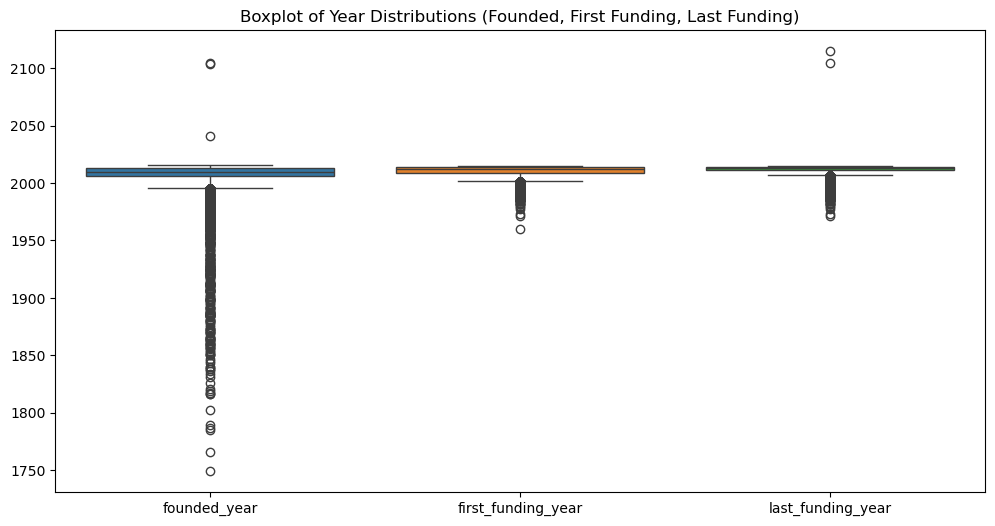

In [1046]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['founded_year','first_funding_year','last_funding_year']])
plt.title("Boxplot of Year Distributions (Founded, First Funding, Last Funding)")
plt.show()


In [1047]:
# Safely extract years (returns NaN for NaT)
founded_year = df['founded_at'].dt.year
first_year   = df['first_funding_at'].dt.year
last_year    = df['last_funding_at'].dt.year

# VALID RANGES
valid_founded = (founded_year.between(1900, 2025)) | (founded_year.isna())
valid_first   = (first_year.between(1900, 2025))   | (first_year.isna())
valid_last    = (last_year.between(1900, 2025))    | (last_year.isna())

# FINAL MASK
final_mask = valid_founded & valid_first & valid_last

# FILTER
df = df[final_mask]

print("Rows after filtering:", len(df))


Rows after filtering: 66258


In [1048]:
# Convert to datetime (do this FIRST)
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce')

# Define all inconsistency masks
founded_after_first = df['founded_at'] > df['first_funding_at']
first_after_last = df['first_funding_at'] > df['last_funding_at']
founded_after_last = df['founded_at'] > df['last_funding_at']   # <-- missing before

# Combine all three
any_inconsistency = founded_after_first | first_after_last | founded_after_last

print("Rows to remove:", any_inconsistency.sum())

# Remove inconsistent rows (with .copy() to avoid SettingWithCopyWarning)
df = df.loc[~any_inconsistency].copy()

print("Final rows after removal:", len(df))


Rows to remove: 3761
Final rows after removal: 62497


In [1049]:
print("Null founded_at:", df['founded_at'].isna().sum())
print("Null first_funding_at:", df['first_funding_at'].isna().sum())
print("Null last_funding_at:", df['last_funding_at'].isna().sum())


Null founded_at: 15224
Null first_funding_at: 26
Null last_funding_at: 0


Finding Gap between first_funding_at and last_funding_at after grouping by category + funding_rounds  to estimate missing first_funding_at

In [1050]:
# 1. Compute gap for rows where both dates exist
df['gap'] = df['last_funding_at'] - df['first_funding_at']

# 2. Compute group-wise median gap (by category + funding_rounds)
group_median_gap = (
    df.dropna(subset=['first_funding_at'])
      .groupby(['category', 'funding_rounds'])['gap']
      .median()
)

# 3. Function to infer first_funding_at for missing values
def infer_first_funding(row):
    # If already present, keep original
    if pd.notna(row['first_funding_at']):
        return row['first_funding_at']
    
    key = (row['category'], row['funding_rounds'])
    
    # If this category + funding_rounds group has a median gap → use it
    if key in group_median_gap:
        inferred = row['last_funding_at'] - group_median_gap[key]
    else:
        # Otherwise fallback to overall median gap
        inferred = row['last_funding_at'] - df['gap'].median()
    
    # ❗ SAFETY CHECK: first_funding_at cannot be earlier than founded_at
    if pd.notna(row['founded_at']) and inferred < row['founded_at']:
        return row['founded_at']
    
    return inferred

# 4. Apply the function to fill missing values
df['first_funding_at'] = df.apply(infer_first_funding, axis=1)


In [1051]:
print("Null founded_at:", df['founded_at'].isna().sum())
print("Null first_funding_at:", df['first_funding_at'].isna().sum())
print("Null last_funding_at:", df['last_funding_at'].isna().sum())


Null founded_at: 15224
Null first_funding_at: 0
Null last_funding_at: 0


filling nulls in founded_at from first_founded_at by estimating the gap per category

In [1052]:
import pandas as pd

# 1. Calculate time_to_first_fund for rows where both dates exist
df['time_to_first_fund'] = df['first_funding_at'] - df['founded_at']

# 2. Global median time-to-first-fund (fallback)
median_time_to_fund = df['time_to_first_fund'].median()

# 3. Category-wise median time-to-first-fund
category_medians = (
    df.dropna(subset=['founded_at'])
      .groupby('category')['time_to_first_fund']
      .median()
)

# 4. Function to fill missing founded_at
def infer_founded(row):
    # If founded_at exists → keep it
    if pd.notna(row['founded_at']):
        return row['founded_at']
    
    # If missing founded_at → estimate using category median
    cat = row['category']
    
    if cat in category_medians:
        return row['first_funding_at'] - category_medians[cat]
    
    # Otherwise → use global median
    return row['first_funding_at'] - median_time_to_fund

# 5. Apply function to fill missing founded_at
df['founded_at'] = df.apply(infer_founded, axis=1)


In [1053]:
print("Null founded_at:", df['founded_at'].isna().sum())
print("Null first_funding_at:", df['first_funding_at'].isna().sum())
print("Null last_funding_at:", df['last_funding_at'].isna().sum())


Null founded_at: 0
Null first_funding_at: 0
Null last_funding_at: 0


In [1054]:
df.isna().sum()

permalink                   0
name                        0
homepage_url                0
category_list               0
funding_total_usd           0
status                      0
country_code                0
state_code                  0
region                      0
city                        0
funding_rounds              0
founded_at                  0
first_funding_at            0
last_funding_at             0
category                    0
founded_at_raw          15220
first_funding_at_raw       23
last_funding_at_raw         0
founded_year            15224
first_funding_year         26
last_funding_year           0
gap                        26
time_to_first_fund      15224
dtype: int64

In [1055]:
df_clean = df[['permalink','name','homepage_url','category_list','funding_total_usd','status','country_code','state_code','region','city','funding_rounds','founded_at','first_funding_at','last_funding_at','category']]


In [1056]:
df_clean.isna().sum()

permalink            0
name                 0
homepage_url         0
category_list        0
funding_total_usd    0
status               0
country_code         0
state_code           0
region               0
city                 0
funding_rounds       0
founded_at           0
first_funding_at     0
last_funding_at      0
category             0
dtype: int64